# Обучение нейрона

In [ ]:
import numpy as np

In [ ]:
exams=[[76, 89, 84, 80, 77],
        [76, 88, 80, 80, 73],
        [77, 72, 71, 81, 75],
        [71, 70, 81, 81, 86],
        [79, 85, 84, 84, 88],
        [81, 89, 72, 74, 88],
        [76, 78, 76, 87, 73],
        [83, 87, 78, 71, 89],
        [84, 76, 81, 77, 84],
        [72, 83, 86, 73, 87]]

results = [1,1,0,0,1,1,0,1,1,1]

In [ ]:
exams_np = np.asarray(exams)

In [ ]:
class Linear:
    def __init__(self, weights, bias):
        self.params = {'weights': weights,
                       'bias': bias}

    def forward(self, x):
        out = int(np.dot(self.params['weights'], x) - self.params['bias']>0)
        return out

    def __call__(self, x):
        return self.forward(x)

In [ ]:
weights = np.asarray([1,1,1,0,0])
init_bias = 300
model = Linear(weights=weights,bias=init_bias)

In [ ]:
errors = []
b_list = list(range(200,300))
for b in b_list:
    model.params['bias'] = b
    error = 0
    for i in range(exams_np.shape[0]):
        data = exams_np[i]
        pred = model(data)
        error += abs(results[i]-pred)
    errors.append(error)

In [ ]:
import matplotlib.pyplot as plt

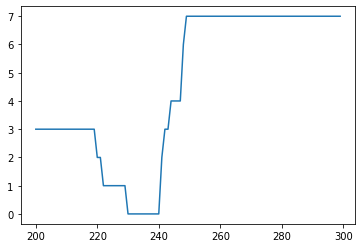

In [ ]:
errors = np.array(errors)
biases = np.array(b_list)
plt.plot(biases, errors)
plt.show()

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
print(sigmoid(1))

0.7310585786300049


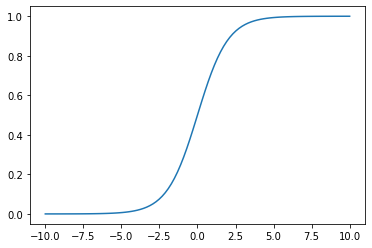

In [ ]:
x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

# Нейронная сеть для XOR

In [ ]:
import numpy as np

In [ ]:
class Linear:
    def __init__(self, weights,bias):
        self.params = {'weights':weights,'bias':bias}
    def forward(self,x):
        out = np.dot(self.params['weights'],x)+self.params['bias']
        return out
    def __call__(self,x):
        return self.forward(x)

Класс нашей сети

In [ ]:
class XOR_Net:
    def __init__(self):
        pass
    def forward(self,x):
        pass
    def __call__(self,x):
        self.forward(x)

XOR = OR - AND

поэтому в сети будет два слоя:

первый вычисляет OR и AND, а во втором будет происходить вычитаение


Создаем первый слой

In [ ]:
class XOR_Net:
    def __init__(self):
        weights = ...
        bias = ...
        self.layer1 = Linear(weights=weights, bias=bias)

    def forward(self,x):
        pass
    def __call__(self,x):
        self.forward(x)

Зададим веса:

первый нейрон будет считать OR, а второй AND

для OR веса [1,1] и bias [0]

для AND веса [1,1] и bias [1] 

In [ ]:
class XOR_Net:
    def __init__(self):
        weights = np.array([[1,1],
                            [1,1]])
        bias = np.array([0,
                         -1])
        
        self.layer1 = Linear(weights=weights, bias=bias)

    def forward(self,x):
        pass
    def __call__(self,x):
        return self.forward(x)

Добавим пороговую функцию активацию

In [ ]:
def threshold(x, dim=0):
    zeros = np.zeros((x.shape[dim]))
    res = x>zeros
    return np.int_(res)

Посчитаем ответы для первого слоя

In [ ]:
class XOR_Net:
    def __init__(self):
        weights = np.array([[1,1],
                            [1,1]])
        bias = np.array([0,
                         -1])
        
        self.layer1 = Linear(weights=weights, bias=bias)
        self.activation1 = threshold

    def forward(self,x):
        res1 = self.layer1(x)
        res1 = self.activation1(res1)
        return res1

    def __call__(self,x):
        return self.forward(x)

Проверим работу сети на наших данных

In [ ]:
dataset = np.array([[0,0],
                    [1,0],
                    [0,1],
                    [1,1]])

correct_answers_or_and = np.array([[0,0],
                                   [1,0],
                                   [1,0],
                                   [1,1]])

Функция для тестирования и вывода результата


функция получает модель, которую мы тестируем, данные и правильные ответы.

функция получает ответ сети на каждый набор данных из датасета и сравнивает её ответ с правильным.

In [ ]:
def test(model, dataset, correct_answers):
    for i in range(dataset.shape[0]):
        data = dataset[i,:]
        model_pred = model(data)
        correct_answer = correct_answers[i]
        is_correct = np.equal(model_pred, correct_answer)
        print("Тест {}. Данные: {}. Ответ модели: {}. Правильный ответ {}.".format(i,data, model_pred, correct_answer, is_correct))

In [ ]:
model = XOR_Net()
test(model, dataset, correct_answers_or_and)

[ 0 -1]
Тест 0. Данные: [0 0]. Ответ модели: [0 0]. Правильный ответ[0 0].        [ True  True]
[1 0]
Тест 1. Данные: [1 0]. Ответ модели: [1 0]. Правильный ответ[1 0].        [ True  True]
[1 0]
Тест 2. Данные: [0 1]. Ответ модели: [1 0]. Правильный ответ[1 0].        [ True  True]
[2 1]
Тест 3. Данные: [1 1]. Ответ модели: [1 1]. Правильный ответ[1 1].        [ True  True]


Добавим второй слой

In [ ]:
class XOR_Net:
    def __init__(self):
        weights = np.array([[1,1],
                            [1,1]])
        bias = np.array([0,
                         -1])
        weights2 = np.array([1,-1])
        bias2 = 0
        
        self.layer1 = Linear(weights=weights, bias=bias)
        self.layer2 = Linear(weights=weights, bias=bias)
        self.activation = threshold

    def forward(self,x):
        res1 = self.layer1(x)
        res1 = self.activation(res1)
        ...
        return res1

    def __call__(self,x):
        return self.forward(x)

Подаём выход первого слоя на вход второго

In [ ]:
class XOR_Net:
    def __init__(self):
        weights = np.array([[1,1],
                            [1,1]])
        bias = np.array([0,
                         -1])
        weights2 = np.array([1,-1])
        bias2 = np.array([0])
        
        self.layer1 = Linear(weights=weights, bias=bias)
        self.layer2 = Linear(weights=weights2, bias=bias2)
        self.activation = threshold

    def forward(self,x):
        res1 = self.layer1(x)
        res1 = self.activation(res1)
        res2 = self.layer2(res1)
        res2 = self.activation(res2)
        return res2

    def __call__(self,x):
        return self.forward(x)

Проверим работу модели

In [ ]:
dataset = np.array([[0,0],
                    [1,0],
                    [0,1],
                    [1,1]])

correct_answers_xor = np.array([0,1,1,0])

model = XOR_Net()
test(model, dataset,correct_answers_xor)

Тест 0. Данные: [0 0]. Ответ модели: [0]. Правильный ответ 0.
Тест 1. Данные: [1 0]. Ответ модели: [1]. Правильный ответ 1.
Тест 2. Данные: [0 1]. Ответ модели: [1]. Правильный ответ 1.
Тест 3. Данные: [1 1]. Ответ модели: [0]. Правильный ответ 0.


# Домашнее задание

1) Построить графики функций при w = 3 и t= 1 на x [-10, 10]

*   (t - w*x)***2
*   exp(-w*x)
*   (exp(2*w*x)-1)/(exp(2*w*x)+1)
*   ln(1+exp(w*x))
*   ln(sigmoid(w*x))

2) для любых четырёх из этих функций найти производные по w (t и x считать константами) для выражений



3) Ниже даны результаты физического эксперимента. Что вы можете сказать о 

*   Новый пункт
*   Новый пункт

зависимости y от x?

In [ ]:
x = np.array([0.,         0.26, 0.52, 0.78, 1.05, 1.31,
 1.57, 1.84, 2.10, 2.36, 2.63, 2.89,
 3.15, 3.42, 3.68, 3.94, 4.21, 4.47,
 4.73, 5.       ])
y = np.array([ 4.55, 23.68, 12.88, 15.2,  17.15, 16.02, 8.66, 23.99, 19.11, 14.28, 40.9,  22.13,
 34.3, 28.51, 48.99, 34.36, 60.34, 53.91, 44.36, 45.61])

4) Напишите любую нейросеть, вычисляющую выражение:

(x1 and x2) or (x1 and x3)
